# Explore properties of the Poisson distribution

In [1]:
import seaborn as sns
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)


In [12]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
with pm.Model() as model:
    p1 = pm.Poisson('p1', 10) #bins, shape=len(bins))
    p2 = pm.Poisson('p2', 15) #bins, shape=len(bins))
    p1_2 = pm.Deterministic('p1_2', p1/p2)
    p12 = pm.Deterministic('p12', p1*p2)

    trace = pm.sample(10000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p2]
>Metropolis: [p1]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:03<00:00, 5582.42draws/s]
The number of effective samples is smaller than 25% for some parameters.


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1279a9890>,
      dtype=object)

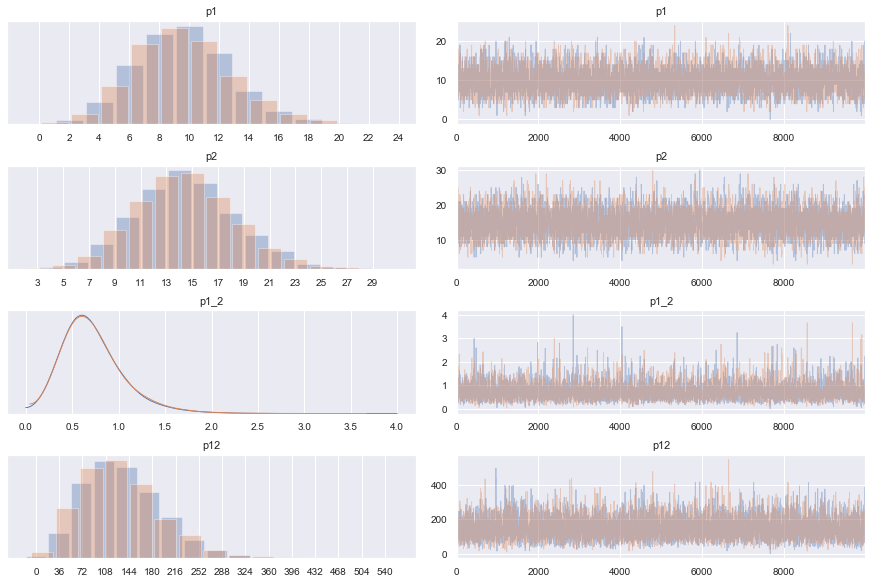

In [13]:
pm.traceplot(trace)

In [14]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p1,10.084,3.222,3.000,15.000,0.054,0.040,3534.0,3307.0,3615.0,3772.0,1.0
p2,14.983,3.847,8.000,22.000,0.065,0.047,3549.0,3382.0,3604.0,3982.0,1.0
p1_2,0.726,0.331,0.211,1.333,0.006,0.004,3616.0,3616.0,3514.0,5517.0,1.0
p12,150.921,62.782,39.000,260.000,1.021,0.739,3781.0,3613.0,3905.0,5457.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a930dd0>,
      dtype=object)

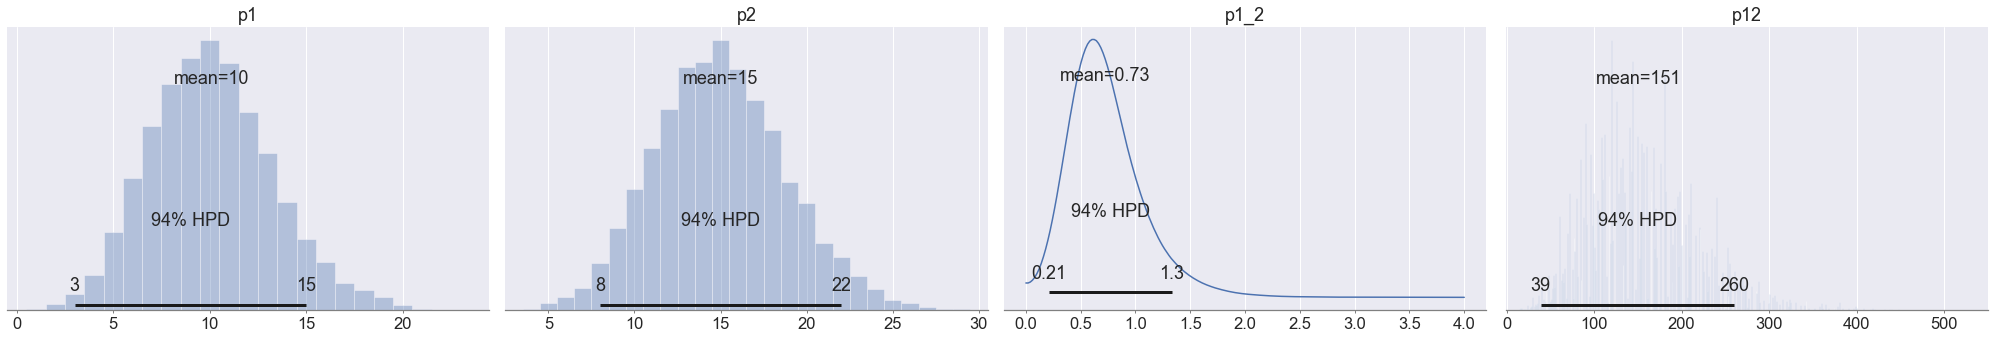

In [15]:
pm.plot_posterior(trace)